In [1]:
import gym
from ppo import PPO
import torch
import variable as v
from train_session import TrainSession
from copy import deepcopy
import numpy as np
import utils

In [2]:
env = gym.make("CartPole-v0")
train_session = None

In [3]:
env.reset().shape

(4,)

In [4]:
env.reset()

action_shape = env.action_space.n

state_shape = env.observation_space.shape[0]

seed = 5623

In [5]:
actor_init = {'network_init': {'i_shape': state_shape, 
                               'l1_shape': 64, 
                               'l2_shape': 64,
                               'o_shape': action_shape
                              },
              'optimizer': {'lr': 1e-4},
              'entropy_learning_rate': 1e-2
             }

critic_init = {'network_init': {'i_shape': state_shape, 
                               'l1_shape': 64, 
                               'l2_shape': 64
                              },
              'optimizer': {'lr': 1e-3}
             }


ppo_init = {
    'seed': seed,
    'action_shape': action_shape,
    'discount_factor': .99,
    'num_action': action_shape,
    'epsilon': 0.2,
    'num_epoch': 10,
    'mini_batch_size': 128,
    'actor': actor_init,
    'critic': critic_init
}

In [13]:
if not train_session:
    print('Train Session reset')
    train_session = TrainSession({}, env, seed)

Train Session reset


In [14]:
if False:
    agents_created = {
        'ppo_agent': PPO(ppo_init)
    }
    agent_names = train_session.append_agents(agents_created)
else:
    d = {('num_epoch', ): [1, 5, 10, 20, 50]}
    agent_names = train_session.parameter_grid_append(PPO, ppo_init, d)
    

In [15]:
all_agent_names = train_session.agents.keys()
s = '\n- '.join(all_agent_names)
print(f"All Agents: \n- {s}")

All Agents: 
- PPO: num_epoch:1;
- PPO: num_epoch:5;
- PPO: num_epoch:10;
- PPO: num_epoch:20;
- PPO: num_epoch:50;


In [20]:
n_episode = 500
t_max_per_episode = 400
graphical = False

In [ ]:
train_session.train(n_episode=n_episode, t_max_per_episode=t_max_per_episode,
                    graphical=graphical, agent_subset=agent_names)

 74%|███████▍  | 372/500 [00:54<00:23,  5.47it/s]

In [ ]:
train_session.plot_train(window=200, agent_subset=agent_names)

100%|██████████| 10/10 [00:18<00:00,  1.84s/it]


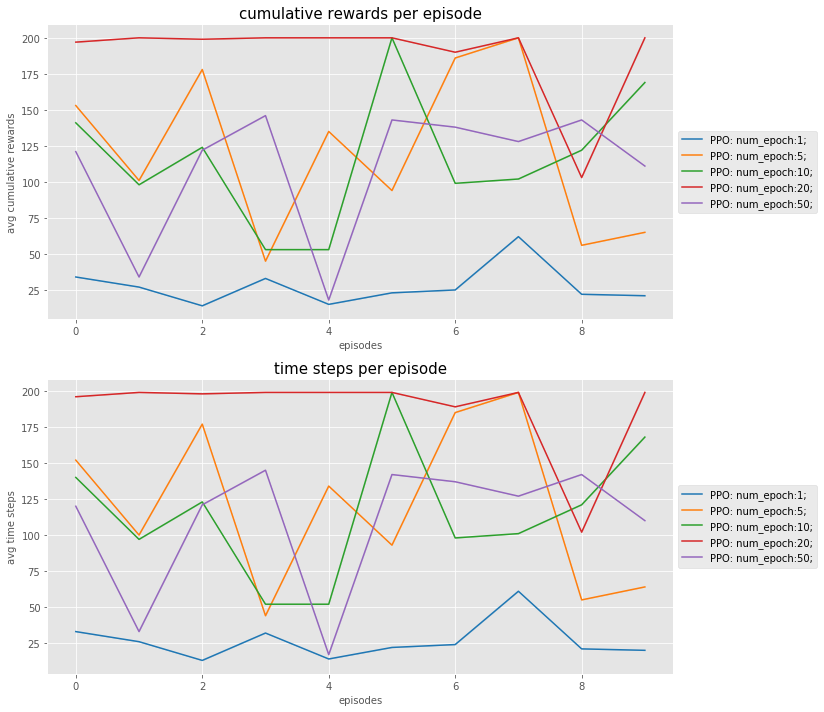

In [19]:
train_session.test(n_episode=10, t_max_per_episode=t_max_per_episode, 
                   graphical=True, agent_subset=None, plot=True,
                   window=1, save_video=False)